In [3]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
!wget https://learner.csie.ntu.edu.tw/~judge/ml19spring/ml19spring.zip

--2019-06-05 13:28:59--  https://learner.csie.ntu.edu.tw/~judge/ml19spring/ml19spring.zip
Resolving learner.csie.ntu.edu.tw (learner.csie.ntu.edu.tw)... 140.112.90.193
Connecting to learner.csie.ntu.edu.tw (learner.csie.ntu.edu.tw)|140.112.90.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3780741206 (3.5G) [application/zip]
Saving to: ‘ml19spring.zip’

ml19spring.zip      100%[===================>]   3.52G  7.94MB/s    in 6m 1s   

2019-06-05 13:35:03 (9.99 MB/s) - ‘ml19spring.zip’ saved [3780741206/3780741206]



In [3]:
!unzip -q ml19spring.zip
!ls

ml19spring.zip	sample_data  X_test.npz  X_train.npz  Y_train.npz


In [0]:
import numpy as np
x_test = np.load('X_test.npz')['arr_0']
x_train = np.load('X_train.npz')['arr_0']
y_train = np.load('Y_train.npz')['arr_0']

In [0]:
for i in range(10,1,-1):
  print(i)

10
9
8
7
6
5
4
3
2


In [0]:
for i in range(4999,0,-1):
  x_train[:,i] = x_train[:,i]-x_train[:,i-1]
  x_test[:,i] = x_test[:,i]-x_test[:,i-1]

In [0]:
for i in range(50):
  for j in range(99,0,-1):
    x_train[:,5000+50*i+j] = x_train[:,5000+50*i+j] - x_train[:,5000+50*i+j-1]
    x_test[:,5000+50*i+j] = x_test[:,5000+50*i+j] - x_test[:,5000+50*i+j-1]

In [0]:
y_train[:,0] = y_train[:,0]*300;
y_train[:,2] = y_train[:,2]*200;

(10000,)


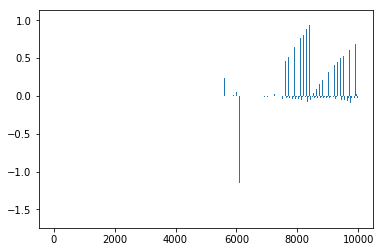

In [8]:
import matplotlib.pyplot as plt
d = range(10000)
x_mean = x_train.mean(axis=0)
print(x_mean.shape)
plt.bar(d,x_mean)
plt.show()

In [0]:
y_train[:10]

array([[ 39.22628839, 122.28576511, 160.73399218],
       [297.61153096, 177.30364034, 119.72717485],
       [267.99640982, 247.92357697, 120.70292039],
       [262.76512152, 200.43757209, 155.4762326 ],
       [231.71027091, 135.86572889, 116.53922469],
       [297.53474121, 167.98523565, 129.82439719],
       [187.4045031 ,  28.44641793, 191.43983144],
       [170.14115634,  46.58578811, 132.73918789],
       [226.71541499,  45.91570878, 122.52029094],
       [113.52329183,  35.80395037, 165.3220747 ]])

In [0]:
y_train[:10]

array([[1.30754295e-01, 1.22285765e+02, 8.03669961e-01],
       [9.92038437e-01, 1.77303640e+02, 5.98635874e-01],
       [8.93321366e-01, 2.47923577e+02, 6.03514602e-01],
       [8.75883738e-01, 2.00437572e+02, 7.77381163e-01],
       [7.72367570e-01, 1.35865729e+02, 5.82696123e-01],
       [9.91782471e-01, 1.67985236e+02, 6.49121986e-01],
       [6.24681677e-01, 2.84464179e+01, 9.57199157e-01],
       [5.67137188e-01, 4.65857881e+01, 6.63695939e-01],
       [7.55718050e-01, 4.59157088e+01, 6.12601455e-01],
       [3.78410973e-01, 3.58039504e+01, 8.26610373e-01]])

In [0]:
print('x_test:',x_test.shape)
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)

x_test: (2500, 10000)
x_train: (47500, 10000)
y_train: (47500, 3)


In [0]:
y_train[:,0].shape

(47500,)

# Linear Regression

In [0]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
import pickle
with open('model/linear_reg.pkl','wb') as model:
    pickle.dump(linear_reg,model)

In [0]:
y_pred_linear_reg = linear_reg.predict(x_test)

In [0]:
y_pred_linear_reg.shape

(2500, 3)

In [0]:
np.savetxt('pred_linear_reg.csv',y_pred_linear_reg,delimiter=',')

# Ridge Regression

In [0]:
from sklearn import linear_model
linear_ridge_reg = linear_model.Ridge(alpha=.5)
linear_ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
y_pred_ridge_reg = linear_ridge_reg.predict(x_test)

In [0]:
np.savetxt('pred_ridge_reg.csv',y_pred_ridge_reg,delimiter=',')

# Lasso

In [0]:
from sklearn import linear_model
#x_train /= x_train.std(axis=0)
Lasso_reg = linear_model.Lasso(alpha=0.1,max_iter=10000,tol=0.0001)
Lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
y_pred_Lasso_reg = Lasso_reg.predict(x_test)

In [0]:
np.savetxt('pred_Lasso_reg.csv',y_pred_Lasso_reg,delimiter=',')

# ElasticNet

In [0]:
from sklearn.linear_model import ElasticNet
Elastic_reg = ElasticNet(random_state=0)
Elastic_reg.fit(x_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
y_pred_Elastic_reg = Elastic_reg.predict(x_test)

In [0]:
np.savetxt('pred_Elastic_reg.csv',y_pred_Elastic_reg,delimiter=',')

# Least Angle Regression

In [0]:
from sklearn import linear_model
LAR_reg = linear_model.Lars()
LAR_reg.fit(x_train,y_train)

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=500, normalize=True, positive=False,
   precompute='auto', verbose=False)

In [0]:
y_pred_LAR_reg = LAR_reg.predict(x_test)

In [0]:
np.savetxt('pred_LAR_reg.csv',y_pred_LAR_reg,delimiter=',')

# XGBoost

In [0]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
# xgdmat = xgb.DMatrix(x_train,y_train)
# params = {'objective':'mae'}
# final_gb = xgb.train(params,xgdmat)
multioutput_regressor = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:mae')).fit(x_train,y_train)
y_pred_xgboost = multioutput_regressor.predict(x_test)

In [0]:
np.savetxt('pred_xgboost_reg.csv',y_pred_xgboost,delimiter=',')

# LightGBM

In [15]:
!git clone --recursive https://github.com/Microsoft/LightGBM

Cloning into 'LightGBM'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 13643 (delta 8), reused 5 (delta 3), pack-reused 13622
Receiving objects: 100% (13643/13643), 9.63 MiB | 21.08 MiB/s, done.
Resolving deltas: 100% (9753/9753), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'compute'
Cloning into '/content/LightGBM/compute'...
remote: Enumerating objects: 72, done.        
remote: Counting objects: 100% (72/72), done.        
remote: Compressing objects: 100% (47/47), done.        
remote: Total 21728 (delta 30), reused 44 (delta 19), pack-reused 21656        
Receiving objects: 100% (21728/21728), 8.53 MiB | 27.57 MiB/s, done.
Resolving deltas: 100% (17550/17550), done.
Submodule path 'compute': checked out '36c89134d4013b2e5e45bc55656a18bd6141995a'


In [10]:
%cd /content/LightGBM

/content/LightGBM


In [11]:
!mkdir build

mkdir: cannot create directory ‘build’: File exists


In [12]:
!cmake -DUSE_GPU=1 #avoid ..
!make -j$(nproc)

-- Found OpenMP_C: -fopenmp  
-- Found OpenMP_CXX: -fopenmp  
-- Found OpenMP: TRUE   
-- OpenCL include directory: /usr/include
-- Boost version: 1.65.1
-- Found the following Boost libraries:
--   filesystem
--   system
-- Configuring done
-- Generating done
-- Build files have been written to: /content/LightGBM
[ 49%] Built target lightgbm
[100%] Built target _lightgbm


In [19]:
!sudo -H pip install setuptools pandas numpy scipy scikit-learn -U

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (41.0.1)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.24.2)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.16.4)
Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (1.3.0)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.21.2)


In [13]:
%cd /content/LightGBM/python-package

/content/LightGBM/python-package


In [14]:
!sudo python setup.py install --precompile

running install
running build
running build_py
INFO:root:Generating grammar tables from /usr/lib/python3.6/lib2to3/Grammar.txt
INFO:root:Generating grammar tables from /usr/lib/python3.6/lib2to3/PatternGrammar.txt
running egg_info
writing lightgbm.egg-info/PKG-INFO
writing dependency_links to lightgbm.egg-info/dependency_links.txt
writing requirements to lightgbm.egg-info/requires.txt
writing top-level names to lightgbm.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
no previously-included directories found matching 'build'
writing manifest file 'lightgbm.egg-info/SOURCES.txt'
running install_lib
INFO:LightGBM:Installing lib_lightgbm from: ['../lib_lightgbm.so']
running install_egg_info
removing '/usr/local/lib/python3.6/dist-packages/lightgbm-2.2.4-py3.6.egg-info' (and everything under it)
Copying lightgbm.egg-info to /usr/local/lib/python3.6/dist-packages/lightgbm-2.2.4-py3.6.egg-info
running install_scripts


In [0]:
from sklearn.preprocessing import normalize
x_train = normalize(x_train)
x_test = normalize(x_test)

In [0]:
import lightgbm as lgb
from sklearn.externals import joblib
from sklearn.multioutput import MultiOutputRegressor
bst = MultiOutputRegressor(lgb.LGBMRegressor(objective='mape',device_type='gpu')).fit(x_train,y_train)
y_pred_lightgbm = bst.predict(x_test)

In [0]:
np.savetxt('pred_lightgbm_reg.csv',y_pred_lightgbm,delimiter=',')
joblib.dump(bst, 'bst.pkl')

In [0]:
load_model = joblib.load('bst.pkl')

In [0]:
print(load_model)

MultiOutputRegressor(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective='mape',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
           n_jobs=None)


In [0]:
y_pred_lightgbm

array([[3.46838903e-01, 1.54689915e+02, 5.65919994e-01],
       [5.55811642e-01, 1.29335821e+02, 8.90814082e-01],
       [6.23188895e-01, 1.18893843e+02, 8.06928084e-01],
       [1.50032210e-01, 1.21101851e+02, 8.09364557e-01],
       [3.72077710e-01, 1.13312602e+02, 7.83787643e-01],
       [7.29344081e-01, 1.32551930e+02, 8.32653645e-01],
       [6.29160844e-01, 1.09369955e+02, 8.93586235e-01],
       [2.84316161e-01, 1.69228030e+02, 5.73141349e-01],
       [1.85005460e-01, 5.64537529e+01, 8.85357768e-01],
       [7.36757675e-01, 1.43074447e+02, 7.12977376e-01]])

# Adaboost

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.externals import joblib
ada_reg = MultiOutputRegressor(AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), loss='square',n_estimators=100)).fit(x_train[:100],y_train[:100])
y_pred_adaboost_dt = ada_reg.predict(x_test[:10])

In [0]:
np.savetxt('pred_adaboost_dt_reg.csv',y_pred_adaboost_dt,delimiter=',')
joblib.dump(ada_reg, 'ada.pkl')

['ada.pkl']

In [0]:
y_pred_adaboost

array([[4.83694640e-01, 1.76544702e+02, 5.63101293e-01],
       [5.50491343e-01, 1.29154423e+02, 9.11015047e-01],
       [6.00817280e-01, 1.50489266e+02, 8.19984183e-01],
       [1.70893817e-01, 1.14992005e+02, 8.01018652e-01],
       [1.93893473e-01, 1.54995566e+02, 7.85020066e-01],
       [5.24372972e-01, 1.40469545e+02, 8.20600205e-01],
       [5.66955771e-01, 1.50489266e+02, 8.99425599e-01],
       [1.82261413e-01, 1.58239589e+02, 5.34278887e-01],
       [1.82261413e-01, 1.05151144e+02, 9.02835543e-01],
       [6.87122666e-01, 1.55996182e+02, 7.07264976e-01]])